In [227]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import hvplot.pandas
from bokeh.sampledata.autompg import autompg_clean as df

In [228]:
# Load the listings.csv dataset.
file_path = "listings.csv"
df = pd.read_csv(file_path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,85,1,185,2021-06-21,2.45,1,338
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,65,2,401,2021-05-22,3.32,1,59
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,143,4,28,2021-06-21,0.32,10,102
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.904910,-87.632130,Entire home/apt,99,7,11,2021-05-09,0.14,1,242
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,329,2,7,2021-07-06,0.10,1,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,50917853,Stretch out. Work. Unwind. | Studio in Chicago,342643084,Kia,NaN,Near South Side,41.861608,-87.625755,Entire home/apt,131,33,0,NaN,NaN,17,365
6362,50944574,RoomM2,327103193,Jorge,NaN,East Side,41.705821,-87.536382,Private room,22,32,0,NaN,NaN,12,89
6363,50944692,Room M3,327103193,Jorge,NaN,East Side,41.707917,-87.538401,Private room,21,32,0,NaN,NaN,12,89
6364,50950455,#E Comfy Private bedroom Shared bath Near Down...,401777272,Sweet Home Of Chicago,NaN,Bridgeport,41.845373,-87.646210,Private room,55,1,0,NaN,NaN,6,362


In [229]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

# Keep the rows where price is greater than zero
df = df[df["price"]>0]

df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,85,1,185,2021-06-21,2.45,1,338
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,65,2,401,2021-05-22,3.32,1,59
2,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.91196,-87.63981,Entire home/apt,143,4,28,2021-06-21,0.32,10,102
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,11,2021-05-09,0.14,1,242
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.10,1,165


In [230]:
df = df.drop(['name', 'host_name', "last_review"], axis=1)
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,2613,Hyde Park,41.78790,-87.58780,Private room,85,1,185,2.45,1,338
1,7126,17928,West Town,41.90166,-87.68021,Entire home/apt,65,2,401,3.32,1,59
2,10945,33004,Lincoln Park,41.91196,-87.63981,Entire home/apt,143,4,28,0.32,10,102
3,12068,40731,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,11,0.14,1,242
4,12140,46734,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,0.10,1,165


In [232]:
# Use get_dummies() to create variables for text features.
X = df.drop('price', axis=1)
X = pd.get_dummies(X)
#X = pd.get_dummies(df, columns=['neighbourhood','room_type'], prefix_sep='_')
X .head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Albany Park,...,neighbourhood_West Garfield Park,neighbourhood_West Lawn,neighbourhood_West Pullman,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2384,2613,41.78790,-87.58780,1,185,2.45,1,338,0,...,0,0,0,0,0,0,0,0,1,0
1,7126,17928,41.90166,-87.68021,2,401,3.32,1,59,0,...,0,0,0,0,1,0,1,0,0,0
2,10945,33004,41.91196,-87.63981,4,28,0.32,10,102,0,...,0,0,0,0,0,0,1,0,0,0
3,12068,40731,41.90491,-87.63213,7,11,0.14,1,242,0,...,0,0,0,0,0,0,1,0,0,0
4,12140,46734,41.92357,-87.64947,2,7,0.10,1,165,0,...,0,0,0,0,0,0,0,0,1,0


In [233]:
X.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Albany Park,...,neighbourhood_West Garfield Park,neighbourhood_West Lawn,neighbourhood_West Pullman,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,5.280000e+03,5.280000e+03,5280.000000,5280.000000,5280.00000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,...,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000
mean,2.972659e+07,1.088967e+08,41.900245,-87.665352,6.49053,52.450758,2.657919,10.130682,158.591856,0.008712,...,0.003788,0.001326,0.000947,0.013826,0.116667,0.011932,0.710417,0.010795,0.264773,0.014015
std,1.437791e+07,1.119229e+08,0.060013,0.042212,20.35838,75.404381,4.773417,29.884122,129.212723,0.092940,...,0.061435,0.036390,0.030761,0.116778,0.321053,0.108590,0.453612,0.103349,0.441254,0.117564
min,2.384000e+03,2.153000e+03,41.650640,-87.846720,1.00000,1.000000,0.010000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.875119e+07,1.678259e+07,41.872215,-87.689098,1.00000,5.000000,0.470000,1.000000,28.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.108824e+07,5.979480e+07,41.904925,-87.662600,2.00000,22.000000,1.480000,2.000000,138.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.220822e+07,1.776859e+08,41.941297,-87.635795,3.00000,70.000000,3.300000,7.000000,298.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.064492e+07,4.099733e+08,42.022200,-87.535880,365.00000,1027.000000,121.820000,260.000000,365.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
#X.drop(columns=["name", "host_name", "last_review"], axis=1, inplace=True)
#X.head()

In [256]:
# Create our target
y = df['price']

In [257]:
y.value_counts()

75      101
100      87
80       75
50       74
125      71
       ... 
886       1
918       1
1046      1
1086      1
1898      1
Name: price, Length: 567, dtype: int64

In [237]:
y.shape

(5280,)

In [258]:
# Standardize the data with StandardScaler
StandardScaler().fit_transform(X)

array([[-2.0675485 , -0.9730303 , -1.87219673, ..., -0.10446659,
         1.66638052, -0.11922402],
       [-2.06721866, -0.97289345,  0.02358647, ..., -0.10446659,
        -0.60010303, -0.11922402],
       [-2.06695302, -0.97275874,  0.19523351, ..., -0.10446659,
        -0.60010303, -0.11922402],
       ...,
       [ 1.45334943, -0.95949616,  1.04746938, ..., -0.10446659,
        -0.60010303, -0.11922402],
       [ 1.4546021 ,  2.68282205,  0.73350529, ..., -0.10446659,
        -0.60010303, -0.11922402],
       [ 1.45503224,  1.23850499, -1.48257462, ..., -0.10446659,
         1.66638052, -0.11922402]])

In [239]:
model = LinearRegression()

In [251]:
model.fit(X, y)

LinearRegression()

In [259]:
y_pred = model.predict(X)

In [260]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": df.price}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,-3.083449e+14,85
1,-3.265075e+14,65
2,-3.213652e+14,143
3,-3.246651e+14,99
4,-3.129013e+14,329
5,-3.265075e+14,105
6,-3.213652e+14,133
7,-3.213652e+14,95
8,-3.230093e+14,214
9,-3.107915e+14,110


In [248]:
# Slope
print(model.coef_)

[-5.24164875e-07  6.59559569e-08  1.85767790e+03  1.31840437e+03
 -4.32549497e-01 -3.34925052e-01 -2.25116134e+00 -8.63354919e-01
  2.21306451e-01 -9.85082953e+01  1.11682407e+02  6.61068964e-01
  1.49325624e+02  1.89368094e+02  8.57790720e+00 -4.67333319e+00
 -1.24871951e+02 -7.78947896e+00  2.17037114e+02 -4.87010871e+01
  5.79162961e+01  1.43639266e+02  5.50086609e+01  4.85990005e+01
  6.88292962e+01  1.85503270e+02 -4.03178083e+01 -2.24925503e+01
 -1.91314816e+01 -3.02406941e+01 -2.63329633e+02 -1.04476916e+02
  4.28095664e+01 -1.50592615e+02 -1.17391390e+02  3.19780305e+01
  1.80320288e+02 -2.40110167e+01  8.61093377e+01  1.25708292e+02
 -8.52649210e+01 -7.25131594e+01 -1.61949974e+01 -1.37824470e+02
 -1.46945550e+02 -1.76597230e+01 -1.18281394e+02 -8.26447457e+01
 -2.19040923e+02 -7.16530665e+01  1.05116702e+02 -1.32976563e+01
  1.76159236e+01 -2.95317537e+01  2.23733110e+02  2.79188622e+02
 -6.96689961e+01 -1.69243371e+01 -1.64407865e+01  7.30776246e-02
 -1.50280430e+02  1.10446

In [249]:
# y-intercept
print(model.intercept_)

38071.61348998834


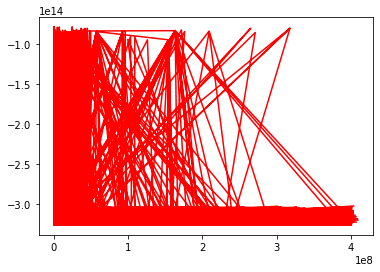

In [266]:
#plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

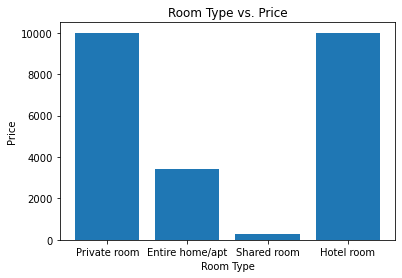

In [223]:
plt.bar(df.room_type, df.price)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Room Type vs. Price')
plt.show()

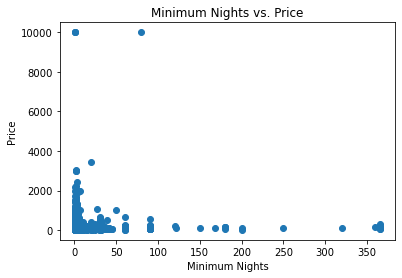

In [224]:
plt.scatter(df.minimum_nights, df.price)
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Minimum Nights vs. Price')
plt.show()